In [ ]:
pip install pycaret[full]

In [ ]:
pip install interpret-community


In [33]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV,train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
#split and scale data
def split_and_scale_data(x, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import  GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
data= pd.read_excel('data.xlsx',sheet_name='Sheet6')
data=data.drop(['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6','FWHM 1', 'FWHM 2', 'FWHM 3', 'FWHM 4', 'FWHM 5',
       'FWHM 6', '2-theta 1', '2-theta 2', '2-theta 3', '2-theta 4',
       '2-theta 5', '2-theta 6', 'Intensity 1', 'Intensity 2', 'Intensity 3',
       'Intensity 4', 'Intensity 5', 'Intensity 6', 'relative_intensity 1',
       'relative_intensity 2', 'relative_intensity 3', 'relative_intensity 4',
       'relative_intensity 5', 'relative_intensity 6',], axis=1)


#Pycaret

In [5]:
x1=data.drop(['Isc'], axis=1)

reg = setup(data=x1 , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=5,

            keep_features=['DROP','PL_amplitude_peak1',
       'PL_amplitude_peak2', 'PL_fwhm_peak1', 'PL_fwhm_peak2',
       'PL_peak_positions_peak1', 'PL_peak_positions_peak2',
       'PL_relative_amplitude_peak1', 'PL_relative_amplitude_peak2']


            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543

            )

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 10)"
4,Transformed data shape,"(27, 10)"
5,Transformed train set shape,"(21, 10)"
6,Transformed test set shape,"(6, 10)"
7,Numeric features,9
8,Keep features,9
9,Preprocess,True


In [6]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4616,0.3933,0.6271,0.9438,0.0135,0.0105,0.0800
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0300
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.5900
rf,Random Forest Regressor,1.0631,1.3843,1.1765,0.8022,0.0277,0.0254,0.1800
ada,AdaBoost Regressor,1.1732,1.5035,1.2262,0.7851,0.0276,0.0273,0.0900
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0100
lar,Least Angle Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0300
et,Extra Trees Regressor,1.4914,2.6694,1.6338,0.6185,0.0376,0.0350,0.1500
huber,Huber Regressor,1.4011,2.7381,1.6547,0.6087,0.0374,0.0325,0.0500
br,Bayesian Ridge,1.3836,3.1281,1.7686,0.5529,0.0411,0.0330,0.0200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [7]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4616,0.3933,0.6271,0.9438,0.0135,0.0105
Train,0.1081,0.0166,0.1289,0.9968,0.0029,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
rf=create_model('rf',cross_validation = False, return_train_score=True)
evaluate_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,1.0631,1.3843,1.1765,0.8022,0.0277,0.0254
Train,0.7019,0.7853,0.8862,0.8486,0.0203,0.0163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#regression result

In [16]:
data.columns

Index(['DROP', 'Isc', 'FF', 'PL_amplitude_peak1', 'PL_amplitude_peak2',
       'PL_fwhm_peak1', 'PL_fwhm_peak2', 'PL_peak_positions_peak1',
       'PL_peak_positions_peak2', 'PL_relative_amplitude_peak1',
       'PL_relative_amplitude_peak2'],
      dtype='object')

In [35]:
x=data.drop(['Isc','FF'], axis=1)
y=data[['FF']]

In [36]:
X_train, X_test, y_train, y_test = split_and_scale_data(x, y, test_size=0.2, random_state=78)

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, np.ravel(y_train))
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_train = best_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

# Get feature importances
feature_importances = best_model.feature_importances_
feature_names = x.columns

# Permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test)

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Sort permutation importance by feature importance
sorted_indices = importance_df.index.values
perm_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': perm_importance['importances_mean']})
perm_importance_df = perm_importance_df.reindex(sorted_indices)

evaluation_metrics = {
    'R-squared Score (Test)': r2,
    'R-squared Score (Train)': r2_train,
    'Best Hyperparameters': grid_search.best_params_,
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'RMSE': rmse
}

print("Feature Importance:")
print(importance_df)
print("\nPermutation Importance:")
print(perm_importance_df)
print("\nEvaluation Metrics:")
print(pd.Series(evaluation_metrics))

Feature Importance:
                       Feature  Importance
0                         DROP    0.418024
6      PL_peak_positions_peak2    0.345673
3                PL_fwhm_peak1    0.057146
1           PL_amplitude_peak1    0.049538
2           PL_amplitude_peak2    0.035305
4                PL_fwhm_peak2    0.028545
7  PL_relative_amplitude_peak1    0.028202
5      PL_peak_positions_peak1    0.026466
8  PL_relative_amplitude_peak2    0.011101

Permutation Importance:
                       Feature  Importance
0                         DROP    0.700287
6      PL_peak_positions_peak2    1.690871
3                PL_fwhm_peak1    0.041976
1           PL_amplitude_peak1    0.017668
2           PL_amplitude_peak2    0.004429
4                PL_fwhm_peak2    0.000529
7  PL_relative_amplitude_peak1    0.006930
5      PL_peak_positions_peak1    0.009171
8  PL_relative_amplitude_peak2   -0.000879

Evaluation Metrics:
R-squared Score (Test)                                              0.8269

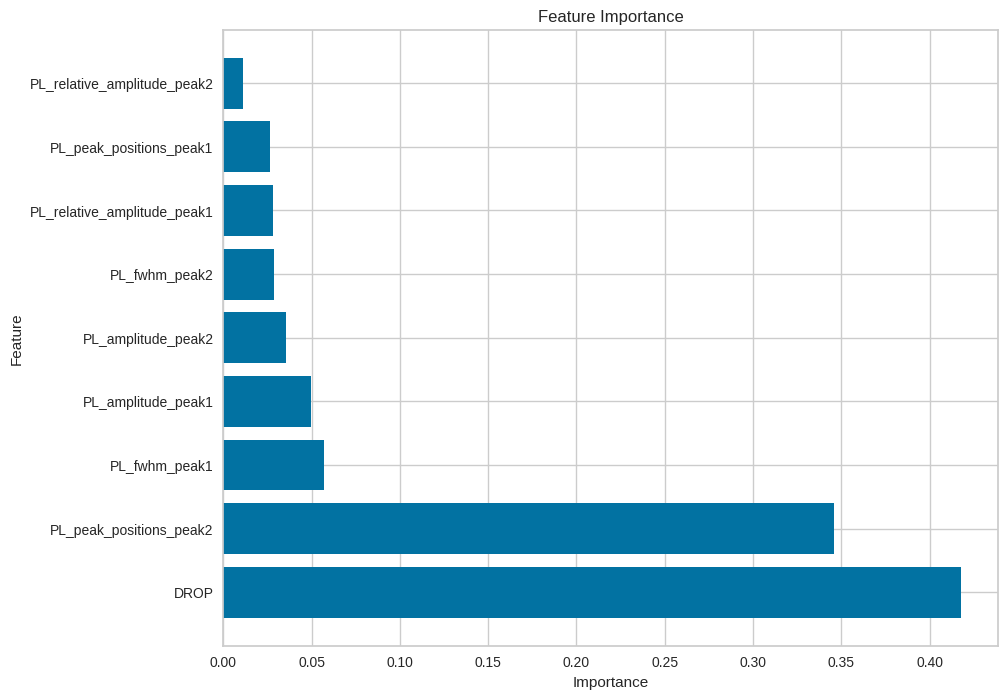

In [38]:
feature_importances = importance_df['Importance'].values
feature_names = importance_df['Feature'].values
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()